In [3]:
%store -r
df 


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,Obesity,HBP
58200,83048,22544,1,169,35.0,140,90,2,1,0,0,1,1,12.254473,1,4
16322,23318,21872,1,165,35.0,100,70,1,1,0,0,1,0,12.855831,1,1
38417,54851,21809,1,154,32.0,110,60,1,1,0,0,1,0,13.493001,1,1
9487,13518,20958,2,172,40.0,140,90,1,2,0,0,1,1,13.520822,1,4
10447,14908,22007,1,162,38.0,100,70,1,1,0,0,1,0,14.479500,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3413,4825,14585,1,159,159.0,100,80,1,1,0,0,1,0,62.893082,5,3
51909,74028,23228,1,142,129.0,140,90,1,3,0,0,1,1,63.975402,5,4
2458,3470,23646,2,159,165.0,130,70,1,1,0,0,0,0,65.266406,5,3
20092,28683,20656,2,165,178.0,120,80,1,1,1,1,1,0,65.381084,5,3


In [4]:
df1=df.drop(columns=["ap_hi", "ap_lo", "height", "weight", "BMI"])
df2=df.drop(columns=["Obesity", "HBP", "height", "weight"])
df1

,id,age,gender,cholesterol,gluc,smoke,alco,active,cardio,Obesity,HBP
58200,83048,22544,1,2,1,0,0,1,1,1,4
16322,23318,21872,1,1,1,0,0,1,0,1,1
38417,54851,21809,1,1,1,0,0,1,0,1,1
9487,13518,20958,2,1,2,0,0,1,1,1,4
10447,14908,22007,1,1,1,0,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
3413,4825,14585,1,1,1,0,0,1,0,5,3
51909,74028,23228,1,1,3,0,0,1,1,5,4
2458,3470,23646,2,1,1,0,0,0,0,5,3
20092,28683,20656,2,1,1,1,1,1,0,5,3


In [5]:
import pandas as pd
df1 = pd.get_dummies(df1, columns=["Obesity", "HBP", "gender"])
df2 = pd.get_dummies(df2, columns=["gender"])
df1.head()

,id,age,cholesterol,gluc,smoke,alco,active,cardio,Obesity_1,Obesity_2,Obesity_3,Obesity_4,Obesity_5,HBP_1,HBP_2,HBP_3,HBP_4,HBP_5,gender_1,gender_2
58200,83048,22544,2,1,0,0,1,1,True,False,False,False,False,False,False,False,True,False,True,False
16322,23318,21872,1,1,0,0,1,0,True,False,False,False,False,True,False,False,False,False,True,False
38417,54851,21809,1,1,0,0,1,0,True,False,False,False,False,True,False,False,False,False,True,False
9487,13518,20958,1,2,0,0,1,1,True,False,False,False,False,False,False,False,True,False,False,True
10447,14908,22007,1,1,0,0,1,0,True,False,False,False,False,True,False,False,False,False,True,False


In [6]:
from sklearn.model_selection import train_test_split

X1, y1 = df1.drop("cardio", axis=1), df1["cardio"]
X2, y2 = df2.drop("cardio", axis=1), df2["cardio"]

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.4, random_state=42)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.4, random_state=42)

X1_val, X1_test, y1_val, y1_test = train_test_split(X1_test, y1_test, test_size=0.5, random_state=42)
X2_val, X2_test, y2_val, y2_test = train_test_split(X2_test, y2_test, test_size=0.5, random_state=42)

print(X1_train.shape, X1_val.shape, X1_test.shape, y1_train.shape, y1_val.shape, y1_test.shape)
print(X2_train.shape, X2_val.shape, X2_test.shape, y2_train.shape, y2_val.shape, y2_test.shape)

(40162, 19) (13388, 19) (13388, 19) (40162,) (13388,) (13388,)
(40162, 12) (13388, 12) (13388, 12) (40162,) (13388,) (13388,)


In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()
sX1_train = scaler.fit_transform(X1_train)
sX1_val = scaler.transform(X1_val)
sX1_test = scaler.transform(X1_test)

sX2_train = scaler.fit_transform(X2_train)
sX2_val = scaler.transform(X2_val)
sX2_test = scaler.transform(X2_test)

scaler = MinMaxScaler()
scaler.fit(sX1_train)
snX1_train=scaler.transform(sX1_train)
snX1_test=scaler.transform(sX1_test)
snX1_val=scaler.transform(sX1_val)

scaler.fit(sX2_train)
snX2_train=scaler.transform(sX2_train)
snX2_test=scaler.transform(sX2_test)
snX2_val=scaler.transform(sX2_val)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model_KNN1 = KNeighborsClassifier(n_neighbors=10)
model_KNN1.fit(snX1_train, y1_train)

y1_pred = model_KNN1.predict(snX1_val)
y1_pred


array([0, 0, 1, ..., 1, 0, 0], shape=(13388,))

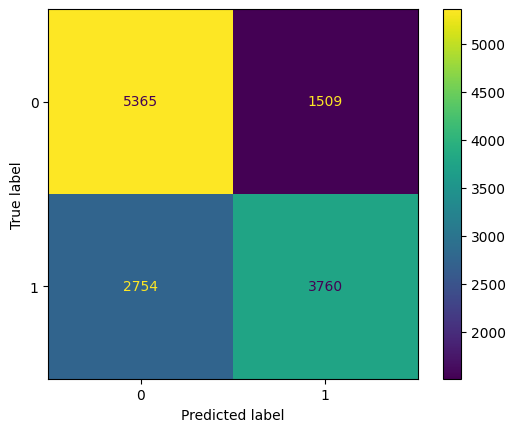

In [9]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score

cm1=confusion_matrix(y1_val, y1_pred)
ConfusionMatrixDisplay(cm1).plot()

In [10]:
print(classification_report(y1_val, y1_pred))

              precision    recall  f1-score   support

           0       0.66      0.78      0.72      6874
           1       0.71      0.58      0.64      6514

    accuracy                           0.68     13388
   macro avg       0.69      0.68      0.68     13388
weighted avg       0.69      0.68      0.68     13388



In [11]:
model_KNN2 = KNeighborsClassifier(n_neighbors=10)
model_KNN2.fit(snX2_train, y2_train)

y2_pred = model_KNN2.predict(snX2_val)
y2_pred

array([0, 0, 1, ..., 0, 0, 0], shape=(13388,))

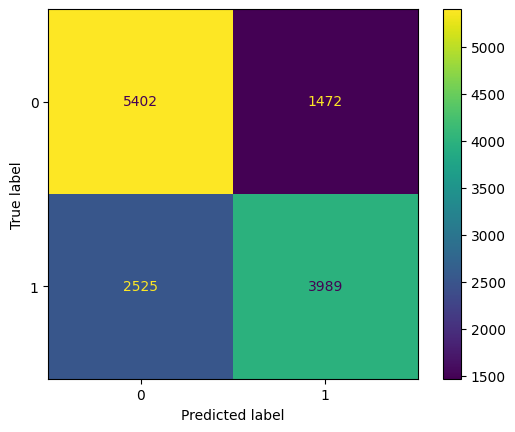

In [12]:
cm2=confusion_matrix(y2_val, y2_pred)
ConfusionMatrixDisplay(cm2).plot()

In [13]:
print(classification_report(y2_val, y2_pred))

              precision    recall  f1-score   support

           0       0.68      0.79      0.73      6874
           1       0.73      0.61      0.67      6514

    accuracy                           0.70     13388
   macro avg       0.71      0.70      0.70     13388
weighted avg       0.71      0.70      0.70     13388



In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

pipe_KNN=Pipeline([("scaler", scaler), ("knn", KNeighborsClassifier())])
param_grid_KNN = {"knn__n_neighbors": list(range(1,30))}

classifier_KNN = GridSearchCV(estimator=pipe_KNN, param_grid=param_grid_KNN, scoring="accuracy")

classifier_KNN.fit(snX1_train, y1_train)


GridSearchCV(estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19,
                                              20, 21, 22, 23, 24, 25, 26, 27,
                                              28, 29]},
             scoring='accuracy')

In [17]:
classifier_KNN.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', MinMaxScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=24))],
 'transform_input': None,
 'verbose': False,
 'scaler': MinMaxScaler(),
 'knn': KNeighborsClassifier(n_neighbors=24),
 'scaler__clip': False,
 'scaler__copy': True,
 'scaler__feature_range': (0, 1),
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 24,
 'knn__p': 2,
 'knn__weights': 'uniform'}

              precision    recall  f1-score   support

           0       0.67      0.79      0.72      6874
           1       0.73      0.60      0.65      6514

    accuracy                           0.69     13388
   macro avg       0.70      0.69      0.69     13388
weighted avg       0.70      0.69      0.69     13388



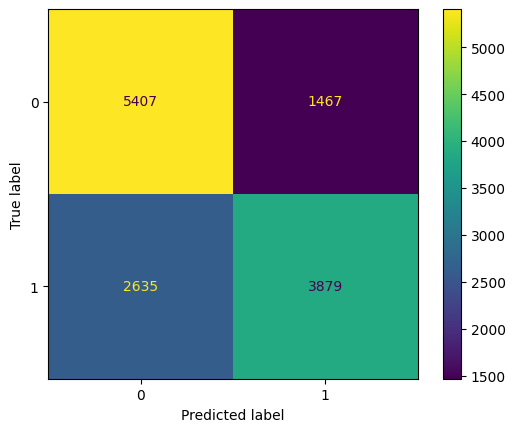

In [18]:
y1_pred=classifier_KNN.predict(snX1_val)
print(classification_report(y1_val, y1_pred))
cm1=confusion_matrix(y1_val, y1_pred)
ConfusionMatrixDisplay(cm1).plot()

In [19]:
classifier_KNN.fit(snX2_train, y2_train)

GridSearchCV(estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19,
                                              20, 21, 22, 23, 24, 25, 26, 27,
                                              28, 29]},
             scoring='accuracy')

In [20]:
classifier_KNN.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', MinMaxScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=29))],
 'transform_input': None,
 'verbose': False,
 'scaler': MinMaxScaler(),
 'knn': KNeighborsClassifier(n_neighbors=29),
 'scaler__clip': False,
 'scaler__copy': True,
 'scaler__feature_range': (0, 1),
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 29,
 'knn__p': 2,
 'knn__weights': 'uniform'}

              precision    recall  f1-score   support

           0       0.71      0.77      0.74      6874
           1       0.74      0.66      0.70      6514

    accuracy                           0.72     13388
   macro avg       0.72      0.72      0.72     13388
weighted avg       0.72      0.72      0.72     13388



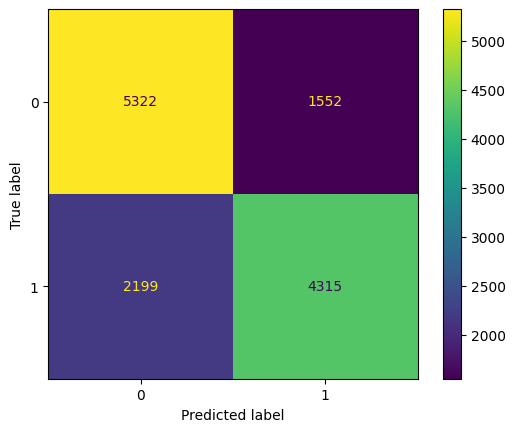

In [21]:
y2_pred=classifier_KNN.predict(snX2_val)
print(classification_report(y2_val, y2_pred))
cm2=confusion_matrix(y2_val, y2_pred)
ConfusionMatrixDisplay(cm2).plot()

In [37]:
import numpy as np
from sklearn.linear_model import LogisticRegression

pipe_log=Pipeline([("scaler", scaler), ("log", LogisticRegression(
    solver="saga", max_iter=1000, penalty="elasticnet"))])

l1_ratio = np.linspace(0, 1, 20)
param_grid_log={"log__l1_ratio": l1_ratio}

classifier_log = GridSearchCV(estimator=pipe_log, param_grid=param_grid_log, scoring="accuracy")

classifier_log.fit(snX1_train, y1_train)


GridSearchCV(estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('log',
                                        LogisticRegression(max_iter=1000,
                                                           penalty='elasticnet',
                                                           solver='saga'))]),
             param_grid={'log__l1_ratio': array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
       0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
       0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
       0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ])},
             scoring='accuracy')

In [38]:
classifier_log.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', MinMaxScaler()),
  ('log',
   LogisticRegression(l1_ratio=np.float64(0.894736842105263), max_iter=1000,
                      penalty='elasticnet', solver='saga'))],
 'transform_input': None,
 'verbose': False,
 'scaler': MinMaxScaler(),
 'log': LogisticRegression(l1_ratio=np.float64(0.894736842105263), max_iter=1000,
                    penalty='elasticnet', solver='saga'),
 'scaler__clip': False,
 'scaler__copy': True,
 'scaler__feature_range': (0, 1),
 'log__C': 1.0,
 'log__class_weight': None,
 'log__dual': False,
 'log__fit_intercept': True,
 'log__intercept_scaling': 1,
 'log__l1_ratio': np.float64(0.894736842105263),
 'log__max_iter': 1000,
 'log__multi_class': 'deprecated',
 'log__n_jobs': None,
 'log__penalty': 'elasticnet',
 'log__random_state': None,
 'log__solver': 'saga',
 'log__tol': 0.0001,
 'log__verbose': 0,
 'log__warm_start': False}

              precision    recall  f1-score   support

           0       0.68      0.80      0.74      6874
           1       0.74      0.61      0.67      6514

    accuracy                           0.71     13388
   macro avg       0.71      0.70      0.70     13388
weighted avg       0.71      0.71      0.70     13388



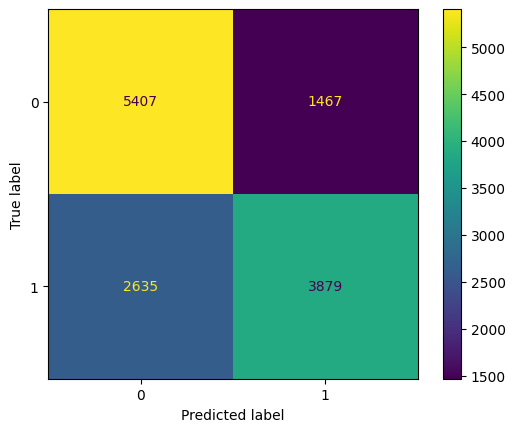

In [39]:
y_pred = classifier_log.predict(snX1_val)
print(classification_report(y1_val, y_pred))
cm=confusion_matrix(y1_val, y1_pred)
ConfusionMatrixDisplay(cm).plot()

In [40]:
classifier_log.fit(snX2_train, y2_train)


GridSearchCV(estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('log',
                                        LogisticRegression(max_iter=1000,
                                                           penalty='elasticnet',
                                                           solver='saga'))]),
             param_grid={'log__l1_ratio': array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
       0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
       0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
       0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ])},
             scoring='accuracy')

In [41]:
classifier_log.best_estimator_.get_params()


{'memory': None,
 'steps': [('scaler', MinMaxScaler()),
  ('log',
   LogisticRegression(l1_ratio=np.float64(0.42105263157894735), max_iter=1000,
                      penalty='elasticnet', solver='saga'))],
 'transform_input': None,
 'verbose': False,
 'scaler': MinMaxScaler(),
 'log': LogisticRegression(l1_ratio=np.float64(0.42105263157894735), max_iter=1000,
                    penalty='elasticnet', solver='saga'),
 'scaler__clip': False,
 'scaler__copy': True,
 'scaler__feature_range': (0, 1),
 'log__C': 1.0,
 'log__class_weight': None,
 'log__dual': False,
 'log__fit_intercept': True,
 'log__intercept_scaling': 1,
 'log__l1_ratio': np.float64(0.42105263157894735),
 'log__max_iter': 1000,
 'log__multi_class': 'deprecated',
 'log__n_jobs': None,
 'log__penalty': 'elasticnet',
 'log__random_state': None,
 'log__solver': 'saga',
 'log__tol': 0.0001,
 'log__verbose': 0,
 'log__warm_start': False}

              precision    recall  f1-score   support

           0       0.71      0.79      0.75      6874
           1       0.75      0.66      0.70      6514

    accuracy                           0.73     13388
   macro avg       0.73      0.72      0.72     13388
weighted avg       0.73      0.73      0.72     13388



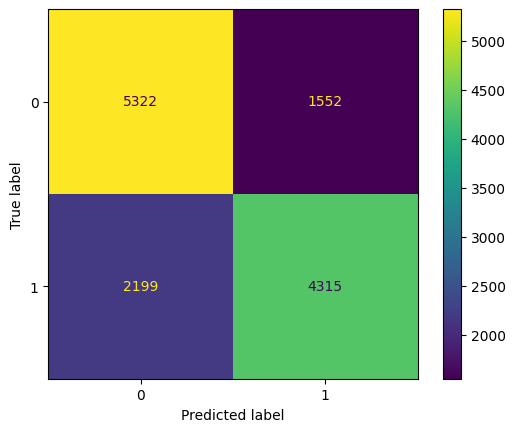

In [42]:
y_pred = classifier_log.predict(snX2_val)
print(classification_report(y2_val, y_pred))
cm=confusion_matrix(y2_val, y2_pred)
ConfusionMatrixDisplay(cm).plot()

In [53]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline


param_grid_SVM = {"C":[0.1, 1, 10],
                  "gamma":[1, 0.1, 0.01],
                  "kernel": ["rbf"]}

classifier_SVM = GridSearchCV(SVC(), param_grid_SVM, refit=True, verbose=3)

classifier_SVM.fit(snX1_train, y1_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.697 total time=  52.2s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.691 total time=  53.5s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.700 total time=  52.8s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.688 total time=  51.1s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.693 total time=  51.8s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.693 total time=  50.2s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.688 total time=  51.7s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.688 total time=  52.2s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.681 total time=  50.9s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.687 total time=  49.9s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.691 total time=  53.3s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf;,

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.01],
                         'kernel': ['rbf']},
             verbose=3)

In [54]:
classifier_SVM.best_estimator_.get_params()

{'C': 1,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 1,
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

              precision    recall  f1-score   support

           0       0.67      0.81      0.74      6874
           1       0.75      0.59      0.66      6514

    accuracy                           0.70     13388
   macro avg       0.71      0.70      0.70     13388
weighted avg       0.71      0.70      0.70     13388



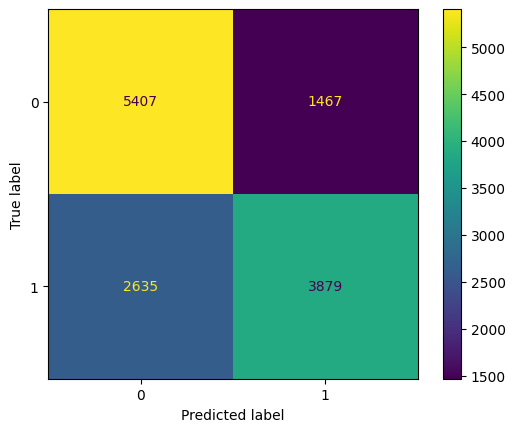

In [56]:
y_pred = classifier_SVM.predict(snX1_val)
print(classification_report(y1_val, y_pred))
cm=confusion_matrix(y1_val, y1_pred)
ConfusionMatrixDisplay(cm).plot()

In [57]:
classifier_SVM.fit(snX2_train, y2_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.732 total time=  43.6s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.726 total time=  42.4s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.725 total time=  42.5s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.719 total time=  41.5s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.722 total time=  42.3s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.726 total time=  45.2s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.720 total time=  46.1s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.722 total time=  46.3s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.714 total time=  44.8s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.719 total time=  43.4s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.670 total time=  50.5s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf;,

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.01],
                         'kernel': ['rbf']},
             verbose=3)

In [58]:
classifier_SVM.best_estimator_.get_params()


{'C': 1,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 1,
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

              precision    recall  f1-score   support

           0       0.71      0.81      0.75      6874
           1       0.76      0.65      0.70      6514

    accuracy                           0.73     13388
   macro avg       0.73      0.73      0.73     13388
weighted avg       0.73      0.73      0.73     13388



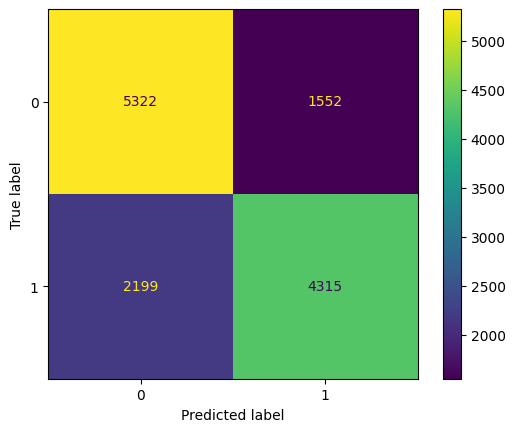

In [59]:
y_pred = classifier_SVM.predict(snX2_val)
print(classification_report(y2_val, y_pred))
cm=confusion_matrix(y2_val, y2_pred)
ConfusionMatrixDisplay(cm).plot()